In [31]:
import pandas as pd

In [32]:
df = pd.read_csv("/content/drive/MyDrive/股票/stock.csv")
df

,股票代號,股票名稱
0,1101,台泥
1,1102,亞泥
2,1103,嘉泥
3,1104,環泥
4,1108,幸福
...,...,...
997,8112A,至上甲特
998,9941A,裕融甲特
999,6854,錼創科技-KY創
1000,6869,雲豹能源-創


In [33]:
sn = input("請輸入股票名稱:")
while True:
  if df["股票名稱"].str.contains(sn).any():
    aa = df["股票代號"].loc[df["股票名稱"] == sn]
    print(aa.values[0])
    break
  else:
    print("unexist")

請輸入股票名稱:台積電
2330


In [34]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override() 

In [36]:
aa.values[0]

'2330'

In [37]:
data = pdr.get_data_yahoo(aa.values[0] + ".TW")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,69.649033,69.649033,68.475182,69.649033,35.203030,200662336736
2000-01-05,69.649033,71.214043,68.866341,71.214043,35.994041,402466805912
2000-01-06,70.822884,71.214043,69.649033,69.649033,35.203030,197545715802
2000-01-07,67.301331,68.475182,66.518639,67.692490,34.214127,235270344752
2000-01-10,69.649033,70.431351,68.475182,70.040192,35.400738,276171685539
...,...,...,...,...,...,...
2023-04-28,498.500000,502.000000,498.000000,502.000000,502.000000,24824100
2023-05-02,500.000000,502.000000,496.500000,501.000000,501.000000,15325791
2023-05-03,496.000000,498.000000,495.000000,496.000000,496.000000,11369311


In [38]:
for i in range(len(data)):
  if (data.Volume[i] == "0"):
    data = data.drop[i]
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,69.649033,69.649033,68.475182,69.649033,35.203030,200662336736
2000-01-05,69.649033,71.214043,68.866341,71.214043,35.994041,402466805912
2000-01-06,70.822884,71.214043,69.649033,69.649033,35.203030,197545715802
2000-01-07,67.301331,68.475182,66.518639,67.692490,34.214127,235270344752
2000-01-10,69.649033,70.431351,68.475182,70.040192,35.400738,276171685539
...,...,...,...,...,...,...
2023-04-28,498.500000,502.000000,498.000000,502.000000,502.000000,24824100
2023-05-02,500.000000,502.000000,496.500000,501.000000,501.000000,15325791
2023-05-03,496.000000,498.000000,495.000000,496.000000,496.000000,11369311


<Axes: xlabel='Date'>

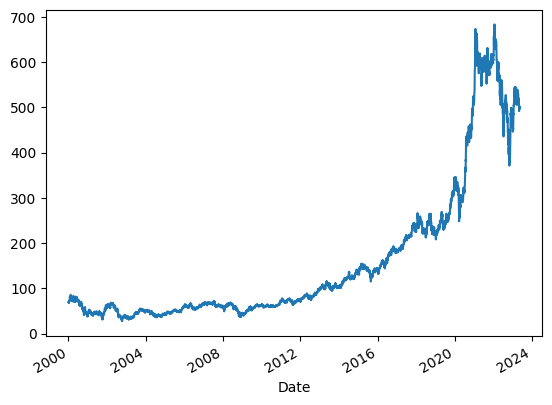

In [39]:
import matplotlib.pyplot as plt
data["Close"].plot()

In [40]:
hday = 400 #歷史天數
df = pd.DataFrame()
df["open"] = data["Open"][-hday:]
df["high"] = data["High"][-hday:]
df["low"] = data["Low"][-hday:]
df["close"] = data["Close"][-hday:]
df["volume"] = data["Volume"][-hday:]

In [41]:
df

,open,high,low,close,volume
Date,,,,,
2021-09-08,622.0,627.0,612.0,619.0,37817737
2021-09-09,612.0,620.0,610.0,619.0,18735512
2021-09-10,615.0,623.0,614.0,622.0,16304725
2021-09-13,619.0,620.0,613.0,615.0,15198774
2021-09-14,618.0,618.0,612.0,613.0,14441901
...,...,...,...,...,...
2023-04-28,498.5,502.0,498.0,502.0,24824100
2023-05-02,500.0,502.0,496.5,501.0,15325791
2023-05-03,496.0,498.0,495.0,496.0,11369311


In [48]:
import numpy as np

In [49]:
data_nor = df.apply(lambda x:(x-np.min(x))/(np.max(x))-(np.min(x)))
data_nor

,open,high,low,close,volume
Date,,,,,
2021-09-08,-370.132847,-378.639535,-369.643068,-370.636896,-7.435151e+06
2021-09-09,-370.147445,-378.649709,-369.646018,-370.636896,-7.435151e+06
2021-09-10,-370.143066,-378.645349,-369.640118,-370.632504,-7.435151e+06
2021-09-13,-370.137226,-378.649709,-369.641593,-370.642753,-7.435151e+06
2021-09-14,-370.138686,-378.652616,-369.643068,-370.645681,-7.435151e+06
...,...,...,...,...,...
2023-04-28,-370.313139,-378.821221,-369.811209,-370.808199,-7.435151e+06
2023-05-02,-370.310949,-378.821221,-369.813422,-370.809663,-7.435151e+06
2023-05-03,-370.316788,-378.827035,-369.815634,-370.816984,-7.435151e+06


In [50]:
day= 1

In [51]:
data_tmp = data_nor.copy()

In [53]:
data_tmp2 = data_tmp["close"].iloc[day:]
data_tmp2 = data_tmp2.reset_index(drop=True)
data_tmp2.name = "after 1 day"
data_tmp2

0     -370.636896
1     -370.632504
2     -370.642753
3     -370.645681
4     -370.654466
          ...    
394   -370.808199
395   -370.809663
396   -370.816984
397   -370.814056
398   -370.811127
Name: after 1 day, Length: 399, dtype: float64

In [54]:
data_pre = data_tmp[-day:]
data_pre

,open,high,low,close,volume
Date,,,,,
2023-05-05,-370.310949,-378.821221,-369.810472,-370.811127,-7.435151e+06


In [59]:
data_tmp1 = data_tmp[0:-day]
data_tmp1 = data_tmp1.reset_index(drop=True)
data_tmp1

,open,high,low,close,volume
0,-370.132847,-378.639535,-369.643068,-370.636896,-7.435151e+06
1,-370.147445,-378.649709,-369.646018,-370.636896,-7.435151e+06
2,-370.143066,-378.645349,-369.640118,-370.632504,-7.435151e+06
3,-370.137226,-378.649709,-369.641593,-370.642753,-7.435151e+06
4,-370.138686,-378.652616,-369.643068,-370.645681,-7.435151e+06
...,...,...,...,...,...
394,-370.324088,-378.831395,-369.824484,-370.820644,-7.435151e+06
395,-370.313139,-378.821221,-369.811209,-370.808199,-7.435151e+06
396,-370.310949,-378.821221,-369.813422,-370.809663,-7.435151e+06
397,-370.316788,-378.827035,-369.815634,-370.816984,-7.435151e+06


In [60]:
data_train = pd.concat([data_tmp1,data_tmp2],axis=1)
data_train

,open,high,low,close,volume,after 1 day
0,-370.132847,-378.639535,-369.643068,-370.636896,-7.435151e+06,-370.636896
1,-370.147445,-378.649709,-369.646018,-370.636896,-7.435151e+06,-370.632504
2,-370.143066,-378.645349,-369.640118,-370.632504,-7.435151e+06,-370.642753
3,-370.137226,-378.649709,-369.641593,-370.642753,-7.435151e+06,-370.645681
4,-370.138686,-378.652616,-369.643068,-370.645681,-7.435151e+06,-370.654466
...,...,...,...,...,...,...
394,-370.324088,-378.831395,-369.824484,-370.820644,-7.435151e+06,-370.808199
395,-370.313139,-378.821221,-369.811209,-370.808199,-7.435151e+06,-370.809663
396,-370.310949,-378.821221,-369.813422,-370.809663,-7.435151e+06,-370.816984
397,-370.316788,-378.827035,-369.815634,-370.816984,-7.435151e+06,-370.814056


In [61]:
from keras.models import Sequential
from keras.layers import Dense



In [62]:
from keras.models import Sequential
from keras.layers import Dense

In [63]:
model = Sequential()

In [64]:
model.add(Dense(200,input_dim=5,activation="sigmoid"))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mean_squared_error"])

In [65]:
x_train = data_train.iloc[:,0:5]
y_train = data_train.iloc[:,5]

In [67]:
model.fit(x_train,y_train,epochs=1000,batch_size = 200)

Epoch 1/1000
2/2 [==============================] - 1s 28ms/step - loss: 137789.3750 - mean_squared_error: 137789.3906
Epoch 2/1000
2/2 [==============================] - 0s 13ms/step - loss: 137682.3281 - mean_squared_error: 137682.3281
Epoch 3/1000
2/2 [==============================] - 0s 11ms/step - loss: 137601.7031 - mean_squared_error: 137601.7188
Epoch 4/1000
2/2 [==============================] - 0s 11ms/step - loss: 137549.5000 - mean_squared_error: 137549.5000
Epoch 5/1000
2/2 [==============================] - 0s 12ms/step - loss: 137518.4531 - mean_squared_error: 137518.4531
Epoch 6/1000
2/2 [==============================] - 0s 13ms/step - loss: 137500.4531 - mean_squared_error: 137500.4531
Epoch 7/1000
2/2 [==============================] - 0s 13ms/step - loss: 137489.8281 - mean_squared_error: 137489.8281
Epoch 8/1000
2/2 [==============================] - 0s 12ms/step - loss: 137483.3750 - mean_squared_error: 137483.3750
Epoch 9/1000
2/2 [==============================

In [68]:
tomor = model.predict(data_pre)
tomor

1/1 [==============================] - 0s 96ms/step


array([[5.7860838e-05]], dtype=float32)

In [70]:
data_min = np.min(df)
data_max = np.max(df)
tomor_price = tomor * (data_max["close"] - data_min["close"]) + data_min["close"]
tomor_price[0][0]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


371.01807